In [7]:
#import libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import MaxNorm
from keras.optimizers import SGD
from keras.layers import Conv2D
from keras.layers import Dense, Conv2D ,Flatten,Dropout,MaxPool2D, BatchNormalization
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory  
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import Flatten
import keras
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
import pandas as pd
import seaborn
from sklearn.metrics import confusion_matrix , classification_report

In [9]:
#import our data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,rotation_range=10, fill_mode='nearest',
     featurewise_center=True,
    featurewise_std_normalization=True,
    vertical_flip= True,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range = (0.4,0.6),
    horizontal_flip=True,validation_split=0.3)



In [10]:
train_generator = train_datagen.flow_from_directory(
    'C:/Users/tyagi/OneDrive/Desktop/Capstone Summer/data',
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary',subset='training'
  )

Found 3942 images belonging to 4 classes.


In [11]:
test_generator = train_datagen.flow_from_directory(
     'C:/Users/tyagi/OneDrive/Desktop/Capstone Summer/data',
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary',subset='validation'
    
  )

Found 1689 images belonging to 4 classes.


Found 5631 files belonging to 4 classes.


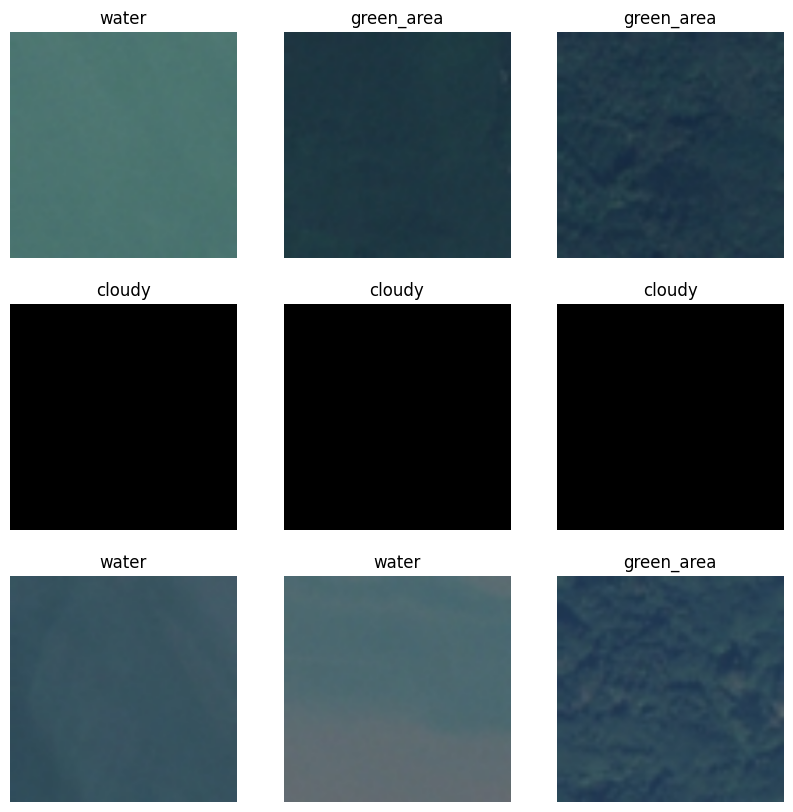

In [12]:
train_dataset = image_dataset_from_directory('C:/Users/tyagi/OneDrive/Desktop/Capstone Summer/data',
                                             shuffle=True,
                                                 batch_size=32,image_size=(299,299))
class_name =  train_dataset.class_names
plt.figure(figsize = (10,10))
for image , label in train_dataset.take(1):
    for i in range(9) :
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_name[label[i]])
        plt.axis("off")

In [13]:
#call Xception model
Xception_model = Xception(include_top=True ,weights='imagenet')
for models in Xception_model.layers:
  models.trainable= False

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [14]:
#converting from functionally model to sequential model
#removing the last 2 alyer to get rid of output layer in VGG16
Xception_model = keras.Model(inputs=Xception_model.input, outputs=Xception_model.layers[-2].output)
model = keras.Sequential()
model.add(Xception_model)

model.add(Dense(4, activation='softmax'))

In [15]:
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [16]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [17]:
FIT =model.fit(train_generator,
    validation_data = test_generator, 
    callbacks = [early],
    epochs = 50)

c:\Users\tyagi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
c:\Users\tyagi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/50


c:\Users\tyagi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


124/124 ━━━━━━━━━━━━━━━━━━━━ 689s 5s/step - accuracy: 0.6239 - loss: 0.9838 - val_accuracy: 0.9118 - val_loss: 0.4590
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 672s 5s/step - accuracy: 0.9219 - loss: 0.4121 - val_accuracy: 0.9165 - val_loss: 0.3264
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 656s 5s/step - accuracy: 0.9282 - loss: 0.3169 - val_accuracy: 0.9509 - val_loss: 0.2586
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 655s 5s/step - accuracy: 0.9447 - loss: 0.2507 - val_accuracy: 0.9544 - val_loss: 0.2127
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 659s 5s/step - accuracy: 0.9513 - loss: 0.2171 - val_accuracy: 0.9568 - val_loss: 0.1934
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 658s 5s/step - accuracy: 0.9505 - loss: 0.1908 - val_accuracy: 0.9580 - val_loss: 0.1825
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 661s 5s/step - accuracy: 0.9651 - loss: 0.1647 - val_accuracy: 0.9580 - val_loss: 0.1588
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 659s 5s/step - accuracy: 0.9592 - loss: 0.1624 - val_accuracy: 0.960

In [18]:
model.evaluate(test_generator)

53/53 ━━━━━━━━━━━━━━━━━━━━ 214s 4s/step - accuracy: 0.9757 - loss: 0.0698


[0.06853915005922318, 0.9769093990325928]

In [19]:
#classes names 
class_name = {0:"cloud",1:"desert", 2 : 'green_area', 3: 'water'}


In [20]:
#predict test data
y = model.predict(test_generator)
y =  np.argmax(y,axis= 1 )
y 

53/53 ━━━━━━━━━━━━━━━━━━━━ 210s 4s/step


array([2, 2, 3, ..., 2, 1, 3], dtype=int64)

In [21]:
#y_true and y_pred
y_true = np.array([])
y_pred = np.array([])

i = 0
for data, labels in test_generator:
  i += 1
  y = np.argmax(model.predict(data), axis=1)
  y_true = np.append(y_true, labels)
  y_pred = np.append(y_pred, y)
  
  if i == test_generator.samples // 32 + 1:
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 

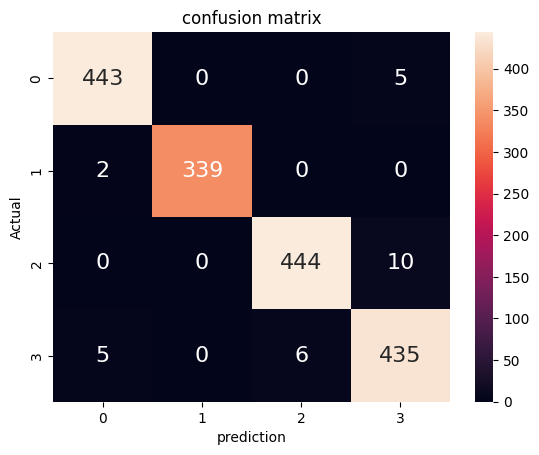

In [22]:
cm  = confusion_matrix(y_pred,y_true)
df_cm = pd.DataFrame(cm, index = [i for i in range(4)],
                  columns = [i for i in range(4)])
seaborn .heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

In [23]:
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       448
         1.0       1.00      0.99      1.00       341
         2.0       0.99      0.98      0.98       454
         3.0       0.97      0.98      0.97       446

    accuracy                           0.98      1689
   macro avg       0.98      0.98      0.98      1689
weighted avg       0.98      0.98      0.98      1689



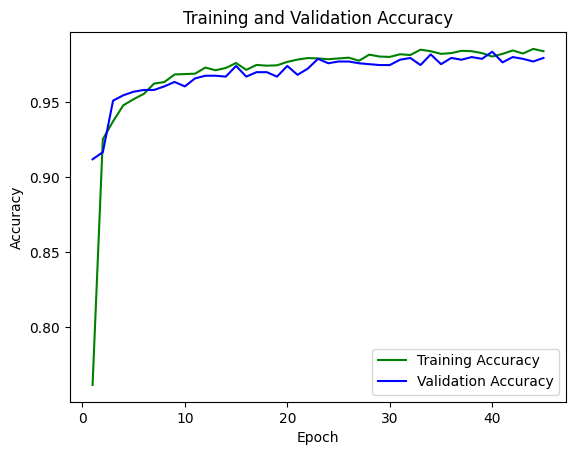

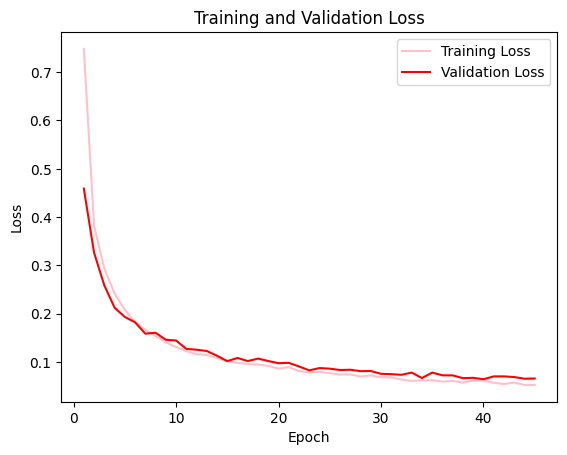

In [24]:
#plot the result
import matplotlib.pyplot as plt
acc = FIT.history['accuracy']
val_acc = FIT.history['val_accuracy']
loss = FIT.history['loss']
val_loss = FIT.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
model.save('Xception_model.h5')